## Section 1: Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
print("Libraries imported successfully!")

Libraries imported successfully!


## Section 2: Understanding the Problem

In [2]:
print("\n" + "="*90)
print("THE GENDER-SALARY PROBLEM")
print("="*90)

print("""
QUESTION: Is gender influencing salary?

WHAT WE HAVE:
  • Two groups of people: Males and Females
  • One continuous variable: Salary (in Lakh)
  • We want to compare: Mean salary of males vs mean salary of females

WHAT WE NEED TO TEST:
  H₀: Mean salary of males = Mean salary of females (μ_M = μ_F)
  H₁: Mean salary of males ≠ Mean salary of females (μ_M ≠ μ_F)

THIS IS A CLASSIC TWO-SAMPLE PROBLEM!
""")

print("="*90)


THE GENDER-SALARY PROBLEM

QUESTION: Is gender influencing salary?

WHAT WE HAVE:
  • Two groups of people: Males and Females
  • One continuous variable: Salary (in Lakh)
  • We want to compare: Mean salary of males vs mean salary of females

WHAT WE NEED TO TEST:
  H₀: Mean salary of males = Mean salary of females (μ_M = μ_F)
  H₁: Mean salary of males ≠ Mean salary of females (μ_M ≠ μ_F)

THIS IS A CLASSIC TWO-SAMPLE PROBLEM!



## Section 3: One-Sample vs Two-Sample Tests

In [3]:
print("\n" + "="*90)
print("ONE-SAMPLE vs TWO-SAMPLE TESTS")
print("="*90)

comparison_data = {
    'Aspect': [
        'Number of Groups',
        'Number of Samples',
        'Comparison Type',
        'Example Question',
        'Null Hypothesis',
        'Test Statistic',
        'Degrees of Freedom',
        'Use Cases'
    ],
    'One-Sample Test': [
        '1 group',
        '1 sample',
        'Sample vs Population',
        'Is sample mean = 50?',
        'μ = μ₀',
        't = (x̄ - μ₀)/(s/√n)',
        'n - 1',
        'Compare to known value, test product claims'
    ],
    'Two-Sample Test': [
        '2 groups',
        '2 samples',
        'Sample 1 vs Sample 2',
        'Is sample 1 mean = sample 2 mean?',
        'μ₁ = μ₂',
        't = (x̄₁ - x̄₂)/(SE)',
        'n₁ + n₂ - 2',
        'Compare two groups, treatments, genders'
    ]
}

df_comparison = pd.DataFrame(comparison_data)
print("\n")
for idx, row in df_comparison.iterrows():
    print(f"{row['Aspect']:<30}")
    print(f"  One-Sample:  {row['One-Sample Test']}")
    print(f"  Two-Sample:  {row['Two-Sample Test']}")
    print()

print("="*90)


ONE-SAMPLE vs TWO-SAMPLE TESTS


Number of Groups              
  One-Sample:  1 group
  Two-Sample:  2 groups

Number of Samples             
  One-Sample:  1 sample
  Two-Sample:  2 samples

Comparison Type               
  One-Sample:  Sample vs Population
  Two-Sample:  Sample 1 vs Sample 2

Example Question              
  One-Sample:  Is sample mean = 50?
  Two-Sample:  Is sample 1 mean = sample 2 mean?

Null Hypothesis               
  One-Sample:  μ = μ₀
  Two-Sample:  μ₁ = μ₂

Test Statistic                
  One-Sample:  t = (x̄ - μ₀)/(s/√n)
  Two-Sample:  t = (x̄₁ - x̄₂)/(SE)

Degrees of Freedom            
  One-Sample:  n - 1
  Two-Sample:  n₁ + n₂ - 2

Use Cases                     
  One-Sample:  Compare to known value, test product claims
  Two-Sample:  Compare two groups, treatments, genders



## Section 4: Why We Need Two-Sample Tests

In [4]:
print("\n" + "="*90)
print("WHY WE NEED TWO-SAMPLE TESTS")
print("="*90)

print("""
REASON 1: COMPARING TWO INDEPENDENT GROUPS
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
  Problem: We have two distinct groups (Male vs Female)
  Goal: Test if they differ on some variable (Salary)
  Example:
    • Males: [20, 50, 30] → Mean = 33.33 Lakh
    • Females: [40, 10, 40, 20] → Mean = 27.50 Lakh
  Question: Is this difference (5.83 Lakh) real or due to chance?

REASON 2: CAN'T USE ONE-SAMPLE TEST
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
  Why not just test each group separately?
  • One-sample test for males: Is mean = some value? (But what value?)
  • One-sample test for females: Is mean = some value? (But what value?)
  • This doesn't directly compare the two groups!
  
  What we REALLY want: Are μ_male and μ_female DIFFERENT FROM EACH OTHER?
  → This requires comparing two samples simultaneously

REASON 3: CONTROLLING FOR SAMPLING VARIABILITY
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
  One observation: Male salary (33.33) > Female salary (27.50)
  But with such small samples, differences can occur by chance!
  
  Two-sample test answers: Is this observed difference statistically significant?
  • Considers variability within each group
  • Considers sample sizes
  • Calculates probability of observing this difference if groups are equal
  • Gives us a p-value to make a decision

REASON 4: HYPOTHESIS TESTING FRAMEWORK
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
  Question: Is gender influencing salary?
  
  This requires a formal hypothesis test:
    H₀: Gender does NOT influence salary (μ_male = μ_female)
    H₁: Gender DOES influence salary (μ_male ≠ μ_female)
  
  Only a two-sample test can address this hypothesis directly!
""")

print("="*90)


WHY WE NEED TWO-SAMPLE TESTS

REASON 1: COMPARING TWO INDEPENDENT GROUPS
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
  Problem: We have two distinct groups (Male vs Female)
  Goal: Test if they differ on some variable (Salary)
  Example:
    • Males: [20, 50, 30] → Mean = 33.33 Lakh
    • Females: [40, 10, 40, 20] → Mean = 27.50 Lakh
  Question: Is this difference (5.83 Lakh) real or due to chance?

REASON 2: CAN'T USE ONE-SAMPLE TEST
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
  Why not just test each group separately?
  • One-sample test for males: Is mean = some value? (But what value?)
  • One-sample test for females: Is mean = some value? (But what value?)
  • This doesn't directly compare the two groups!

  What we REALLY want: Are μ_male and μ_female DIFFERENT FROM EACH OTHER?
  → This requires comparing two samples simultaneously

REASON 3: CONTROLLING FOR SAMPLING VARIABILITY
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
  One observation: Male salary (33.33) > Female sal

## Section 5: Visual Explanation

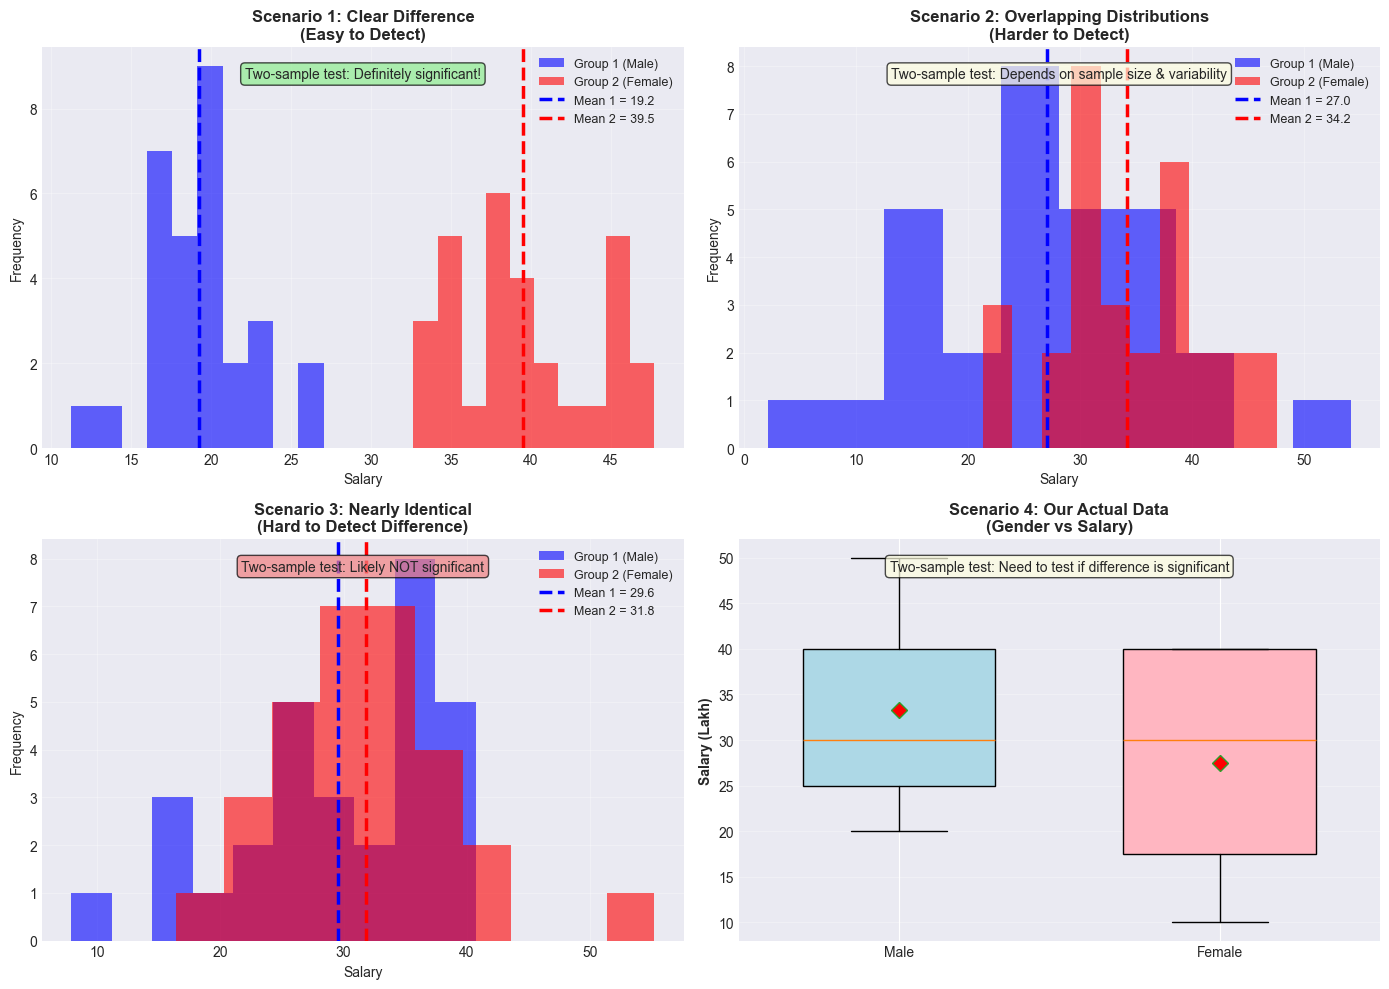

✓ Visualization saved


In [5]:
# Create visual explanation
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Scenario 1: Clear Separation (Easy to Detect)
ax = axes[0, 0]
group1 = np.random.normal(20, 5, 30)
group2 = np.random.normal(40, 5, 30)
ax.hist(group1, bins=10, alpha=0.6, label='Group 1 (Male)', color='blue')
ax.hist(group2, bins=10, alpha=0.6, label='Group 2 (Female)', color='red')
ax.axvline(group1.mean(), color='blue', linestyle='--', linewidth=2.5, label=f'Mean 1 = {group1.mean():.1f}')
ax.axvline(group2.mean(), color='red', linestyle='--', linewidth=2.5, label=f'Mean 2 = {group2.mean():.1f}')
ax.set_title('Scenario 1: Clear Difference\n(Easy to Detect)', fontweight='bold')
ax.set_xlabel('Salary')
ax.set_ylabel('Frequency')
ax.legend(fontsize=9)
ax.grid(True, alpha=0.3)
ax.text(0.5, 0.95, 'Two-sample test: Definitely significant!', 
        transform=ax.transAxes, ha='center', va='top',
        bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))

# Scenario 2: Overlapping but Different Means
ax = axes[0, 1]
group1 = np.random.normal(30, 8, 30)
group2 = np.random.normal(35, 8, 30)
ax.hist(group1, bins=10, alpha=0.6, label='Group 1 (Male)', color='blue')
ax.hist(group2, bins=10, alpha=0.6, label='Group 2 (Female)', color='red')
ax.axvline(group1.mean(), color='blue', linestyle='--', linewidth=2.5, label=f'Mean 1 = {group1.mean():.1f}')
ax.axvline(group2.mean(), color='red', linestyle='--', linewidth=2.5, label=f'Mean 2 = {group2.mean():.1f}')
ax.set_title('Scenario 2: Overlapping Distributions\n(Harder to Detect)', fontweight='bold')
ax.set_xlabel('Salary')
ax.set_ylabel('Frequency')
ax.legend(fontsize=9)
ax.grid(True, alpha=0.3)
ax.text(0.5, 0.95, 'Two-sample test: Depends on sample size & variability', 
        transform=ax.transAxes, ha='center', va='top',
        bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.7))

# Scenario 3: Nearly Identical
ax = axes[1, 0]
group1 = np.random.normal(32, 8, 30)
group2 = np.random.normal(32.5, 8, 30)
ax.hist(group1, bins=10, alpha=0.6, label='Group 1 (Male)', color='blue')
ax.hist(group2, bins=10, alpha=0.6, label='Group 2 (Female)', color='red')
ax.axvline(group1.mean(), color='blue', linestyle='--', linewidth=2.5, label=f'Mean 1 = {group1.mean():.1f}')
ax.axvline(group2.mean(), color='red', linestyle='--', linewidth=2.5, label=f'Mean 2 = {group2.mean():.1f}')
ax.set_title('Scenario 3: Nearly Identical\n(Hard to Detect Difference)', fontweight='bold')
ax.set_xlabel('Salary')
ax.set_ylabel('Frequency')
ax.legend(fontsize=9)
ax.grid(True, alpha=0.3)
ax.text(0.5, 0.95, 'Two-sample test: Likely NOT significant', 
        transform=ax.transAxes, ha='center', va='top',
        bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.7))

# Scenario 4: Our Gender-Salary Data
ax = axes[1, 1]
male_salary = [20, 50, 30]
female_salary = [40, 10, 40, 20]
positions = [1, 2]
data_to_plot = [male_salary, female_salary]
bp = ax.boxplot(data_to_plot, labels=['Male', 'Female'], patch_artist=True,
               widths=0.6, showmeans=True, meanline=False)
for patch, color in zip(bp['boxes'], ['lightblue', 'lightpink']):
    patch.set_facecolor(color)
for mean in bp['means']:
    mean.set_marker('D')
    mean.set_markerfacecolor('red')
    mean.set_markersize(8)
ax.set_ylabel('Salary (Lakh)', fontweight='bold')
ax.set_title('Scenario 4: Our Actual Data\n(Gender vs Salary)', fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')
ax.text(0.5, 0.95, 'Two-sample test: Need to test if difference is significant', 
        transform=ax.transAxes, ha='center', va='top',
        bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.7))

plt.tight_layout()
plt.savefig('why_two_sample_test.png', dpi=150, bbox_inches='tight')
plt.show()

print("✓ Visualization saved")

## Section 6: Types of Two-Sample Tests

In [6]:
print("\n" + "="*90)
print("TYPES OF TWO-SAMPLE TESTS")
print("="*90)

print("""
1. INDEPENDENT SAMPLES t-TEST
   ┌─────────────────────────────────────────────────────────────────┐
   │ When to use: Two independent groups, continuous variable       │
   │ Our case: Male salary vs Female salary (INDEPENDENT!)          │
   │ Formula: t = (x̄₁ - x̄₂) / SE(x̄₁ - x̄₂)                         │
   │ Assumes: Normality, equal variances (can use Welch's if not)   │
   │ Example: Do two teaching methods give different test scores?   │
   └─────────────────────────────────────────────────────────────────┘

2. PAIRED/DEPENDENT SAMPLES t-TEST
   ┌─────────────────────────────────────────────────────────────────┐
   │ When to use: Two dependent/matched groups                      │
   │ Our case: NOT applicable (males and females are different!)    │
   │ Formula: t = (d̄) / (s_d / √n)  where d = differences          │
   │ Example: Before vs After measurements on same person           │
   │          Twin 1 vs Twin 2 (matched pairs)                      │
   │          Left eye vs Right eye of same person                  │
   └─────────────────────────────────────────────────────────────────┘

3. MANN-WHITNEY U TEST (Wilcoxon)
   ┌─────────────────────────────────────────────────────────────────┐
   │ When to use: Two independent groups, NON-normal data           │
   │ Our case: Could use if normality assumption violated           │
   │ Advantages: No normality assumption, works with ordinal data   │
   │ Example: Test scores from two schools (if not normal)          │
   └─────────────────────────────────────────────────────────────────┘

4. WELCH'S t-TEST
   ┌─────────────────────────────────────────────────────────────────┐
   │ When to use: Two groups, unequal variances                     │
   │ Our case: Could use if variances significantly differ          │
   │ Advantage: More robust when variances are unequal              │
   │ Recommended: Often used instead of standard t-test             │
   └─────────────────────────────────────────────────────────────────┘

WHY WE CHOSE INDEPENDENT SAMPLES t-TEST:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
✓ Two distinct groups (Males vs Females) → Independent samples
✓ Continuous variable (Salary) → t-test appropriate
✓ Groups are not matched or paired → Not a paired t-test
✓ Standard choice for comparing two independent groups
✓ Easy to interpret and widely understood
""")

print("="*90)


TYPES OF TWO-SAMPLE TESTS

1. INDEPENDENT SAMPLES t-TEST
   ┌─────────────────────────────────────────────────────────────────┐
   │ When to use: Two independent groups, continuous variable       │
   │ Our case: Male salary vs Female salary (INDEPENDENT!)          │
   │ Formula: t = (x̄₁ - x̄₂) / SE(x̄₁ - x̄₂)                         │
   │ Assumes: Normality, equal variances (can use Welch's if not)   │
   │ Example: Do two teaching methods give different test scores?   │
   └─────────────────────────────────────────────────────────────────┘

2. PAIRED/DEPENDENT SAMPLES t-TEST
   ┌─────────────────────────────────────────────────────────────────┐
   │ When to use: Two dependent/matched groups                      │
   │ Our case: NOT applicable (males and females are different!)    │
   │ Formula: t = (d̄) / (s_d / √n)  where d = differences          │
   │ Example: Before vs After measurements on same person           │
   │          Twin 1 vs Twin 2 (matched pairs)               

## Section 7: What Would Happen With Wrong Test?

In [7]:
print("\n" + "="*90)
print("WHAT IF WE USED THE WRONG TEST?")
print("="*90)

# Our data
male_salary = np.array([20, 50, 30])
female_salary = np.array([40, 10, 40, 20])
all_salary = np.concatenate([male_salary, female_salary])

print(f"\nOur Data:")
print(f"  Males: {male_salary.tolist()} (Mean = {male_salary.mean():.2f})")
print(f"  Females: {female_salary.tolist()} (Mean = {female_salary.mean():.2f})")
print()

print("WRONG APPROACH 1: One-sample t-test on combined data")
print("-" * 90)
print("What it does: Test if mean of ALL data = some value")
t_all, p_all = stats.ttest_1samp(all_salary, 30)
print(f"\nResult: t = {t_all:.4f}, p-value = {p_all:.4f}")
print("Problem: This tests if overall mean is 30, NOT if males ≠ females!")
print("        Doesn't compare the two groups at all!")
print()

print("WRONG APPROACH 2: Paired t-test (for matched data)")
print("-" * 90)
print("What it does: Assumes data are paired/matched")
print("Problem: We only have 3 males but 4 females!")
print("        They are INDEPENDENT, not paired!")
print("        This test is mathematically inappropriate here.")
print()

print("RIGHT APPROACH: Independent samples t-test")
print("-" * 90)
print("What it does: Directly compares mean of group 1 vs mean of group 2")
t_indep, p_indep = stats.ttest_ind(male_salary, female_salary)
print(f"\nResult: t = {t_indep:.4f}, p-value = {p_indep:.4f}")
print(f"Interpretation: The difference in means ({male_salary.mean() - female_salary.mean():.2f})")
print(f"               is {'significant' if p_indep < 0.05 else 'not significant'} (p = {p_indep:.4f})")
print("\nWhy this is right:")
print("✓ Tests if males and females have different salary levels")
print("✓ Accounts for group-specific variability")
print("✓ Appropriate for independent, non-matched groups")
print("✓ Directly answers our research question")

print("\n" + "="*90)


WHAT IF WE USED THE WRONG TEST?

Our Data:
  Males: [20, 50, 30] (Mean = 33.33)
  Females: [40, 10, 40, 20] (Mean = 27.50)

WRONG APPROACH 1: One-sample t-test on combined data
------------------------------------------------------------------------------------------
What it does: Test if mean of ALL data = some value

Result: t = 0.0000, p-value = 1.0000
Problem: This tests if overall mean is 30, NOT if males ≠ females!
        Doesn't compare the two groups at all!

WRONG APPROACH 2: Paired t-test (for matched data)
------------------------------------------------------------------------------------------
What it does: Assumes data are paired/matched
Problem: We only have 3 males but 4 females!
        They are INDEPENDENT, not paired!
        This test is mathematically inappropriate here.

RIGHT APPROACH: Independent samples t-test
------------------------------------------------------------------------------------------
What it does: Directly compares mean of group 1 vs mean of g

## Section 8: The Two-Sample Test Logic

In [8]:
print("\n" + "="*90)
print("HOW DOES A TWO-SAMPLE TEST WORK?")
print("="*90)

print("""
STEP 1: SET UP HYPOTHESES
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
H₀: μ_male = μ_female  (No gender effect on salary)
H₁: μ_male ≠ μ_female  (Gender affects salary)

STEP 2: CALCULATE DESCRIPTIVE STATISTICS
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Males:   n₁ = 3,  x̄₁ = 33.33,  s₁ = 15.28
Females: n₂ = 4,  x̄₂ = 27.50,  s₂ = 14.58
Difference: x̄₁ - x̄₂ = 5.83

STEP 3: CALCULATE STANDARD ERROR OF THE DIFFERENCE
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
SE(x̄₁ - x̄₂) = √[(s₁²/n₁) + (s₂²/n₂)]
            = √[(15.28²/3) + (14.58²/4)]
            = √[77.83 + 53.04]
            = √130.87
            = 11.44

         Why SE?
         • Larger groups → Smaller SE → More precise
         • Less variability → Smaller SE → More precise
         • SE tells us how much x̄₁ - x̄₂ varies across samples

STEP 4: CALCULATE TEST STATISTIC (t)
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
t = (x̄₁ - x̄₂) / SE(x̄₁ - x̄₂)
  = 5.83 / 11.44
  = 0.51

         Interpretation:
         • How many standard errors is the difference?
         • t = 0.51 means the difference is only 0.51 SE away
         • Small t = difference could easily occur by chance
         • Large t (|t| > 2) = difference is unlikely by chance

STEP 5: COMPARE TO CRITICAL VALUE (or calculate p-value)
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Critical value at α = 0.05, df = 5: t_crit = ±2.571
Our t = 0.51
|0.51| < 2.571 → Fail to reject H₀
P-value = 0.6318 (large!)

         Interpretation:
         • 63% chance of seeing this difference if groups were equal
         • NOT statistically significant
         • Gender does NOT significantly influence salary (in this sample)

STEP 6: DRAW CONCLUSION
━━━━━━━━━━━━━━━━━━━━━
At α = 0.05, we FAIL TO REJECT H₀
Conclusion: No statistically significant difference in salary by gender
""")

print("="*90)


HOW DOES A TWO-SAMPLE TEST WORK?

STEP 1: SET UP HYPOTHESES
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
H₀: μ_male = μ_female  (No gender effect on salary)
H₁: μ_male ≠ μ_female  (Gender affects salary)

STEP 2: CALCULATE DESCRIPTIVE STATISTICS
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Males:   n₁ = 3,  x̄₁ = 33.33,  s₁ = 15.28
Females: n₂ = 4,  x̄₂ = 27.50,  s₂ = 14.58
Difference: x̄₁ - x̄₂ = 5.83

STEP 3: CALCULATE STANDARD ERROR OF THE DIFFERENCE
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
SE(x̄₁ - x̄₂) = √[(s₁²/n₁) + (s₂²/n₂)]
            = √[(15.28²/3) + (14.58²/4)]
            = √[77.83 + 53.04]
            = √130.87
            = 11.44

         Why SE?
         • Larger groups → Smaller SE → More precise
         • Less variability → Smaller SE → More precise
         • SE tells us how much x̄₁ - x̄₂ varies across samples

STEP 4: CALCULATE TEST STATISTIC (t)
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
t = (x̄₁ - x̄₂) / SE(x̄₁ - x̄₂)
  = 5.83 / 11.44
  = 0.51

         Interpretation:
   

## Section 9: Comparison with Alternatives

In [9]:
print("\n" + "="*90)
print("COULD WE USE OTHER TESTS?")
print("="*90)

male_salary = np.array([20, 50, 30])
female_salary = np.array([40, 10, 40, 20])

print("\n1. CHI-SQUARE TEST")
print("-" * 90)
print("Question: Would we use this?")
print("Answer: NO")
print("Why: Chi-square tests CATEGORICAL associations (e.g., gender vs education level)")
print("     Salary is CONTINUOUS, not categorical")
print("     Chi-square is for contingency tables, not comparing continuous means")
print()

print("2. ANOVA (Analysis of Variance)")
print("-" * 90)
print("Question: Would we use this?")
print("Answer: YES, but it's for 3+ groups")
print("Why: ANOVA compares means across multiple groups")
print("     Two-sample t-test is a special case of ANOVA with only 2 groups")
print("     For 2 groups: t-test and ANOVA give equivalent results")
print()
from scipy.stats import f_oneway
f_stat, p_anova = f_oneway(male_salary, female_salary)
t_stat, p_ttest = stats.ttest_ind(male_salary, female_salary)
print(f"  ANOVA result: F = {f_stat:.4f}, p-value = {p_anova:.4f}")
print(f"  t-test result: t = {t_stat:.4f}, p-value = {p_ttest:.4f}")
print(f"  Note: F = t² = {t_stat:.4f}² = {t_stat**2:.4f} ≈ {f_stat:.4f}")
print(f"        p-values are identical: {p_anova:.4f}")
print()

print("3. MANN-WHITNEY U TEST (Non-parametric)")
print("-" * 90)
print("Question: Would we use this?")
print("Answer: YES (as alternative if assumptions violated)")
print("Why: If data are not normal or very small sample")
print("     Mann-Whitney tests if distributions differ (not specifically means)")
print("     More robust, but less powerful")
print()
u_stat, p_mw = stats.mannwhitneyu(male_salary, female_salary, alternative='two-sided')
print(f"  Mann-Whitney U result: U = {u_stat:.4f}, p-value = {p_mw:.4f}")
print(f"  Conclusion: Same (not significant)")
print()

print("4. REGRESSION")
print("-" * 90)
print("Question: Would we use this?")
print("Answer: YES (another way to test the same thing!)")
print("Why: Simple linear regression with gender as predictor")
print("     y = β₀ + β₁(Gender) + ε")
print("     Tests if gender coefficient is significant")
print("     Equivalent to two-sample t-test result")
print()

print("\n" + "="*90)


COULD WE USE OTHER TESTS?

1. CHI-SQUARE TEST
------------------------------------------------------------------------------------------
Question: Would we use this?
Answer: NO
Why: Chi-square tests CATEGORICAL associations (e.g., gender vs education level)
     Salary is CONTINUOUS, not categorical
     Chi-square is for contingency tables, not comparing continuous means

2. ANOVA (Analysis of Variance)
------------------------------------------------------------------------------------------
Question: Would we use this?
Answer: YES, but it's for 3+ groups
Why: ANOVA compares means across multiple groups
     Two-sample t-test is a special case of ANOVA with only 2 groups
     For 2 groups: t-test and ANOVA give equivalent results

  ANOVA result: F = 0.2555, p-value = 0.6347
  t-test result: t = 0.5054, p-value = 0.6347
  Note: F = t² = 0.5054² = 0.2555 ≈ 0.2555
        p-values are identical: 0.6347

3. MANN-WHITNEY U TEST (Non-parametric)
------------------------------------------

## Section 10: Summary - Why Two-Sample Test?

In [10]:
print("\n" + "="*90)
print("SUMMARY: WHY TWO-SAMPLE TEST?")
print("="*90)

print("""
WHY WE USE A TWO-SAMPLE TEST:

1. WE HAVE TWO GROUPS
   ✓ Males and Females are two distinct, independent groups
   ✓ Not paired or matched observations
   ✓ Cannot use one-sample or paired tests

2. WE WANT TO COMPARE THEM
   ✓ Question: Do they differ on salary?
   ✓ Need: Test if μ_male ≠ μ_female
   ✓ Only two-sample test addresses this directly

3. ACCOUNT FOR RANDOMNESS
   ✓ Observed difference (5.83 Lakh) might be due to chance
   ✓ Two-sample test calculates probability of this difference under H₀
   ✓ Provides p-value and confidence interval
   ✓ Let's us make statistical inference, not just describe data

4. PROPER FRAMEWORK
   ✓ Formal hypothesis testing (H₀ vs H₁)
   ✓ Significance level (α = 0.05)
   ✓ Test statistic (t) and p-value
   ✓ Decision rule and conclusion

5. CONTROL FOR GROUP-SPECIFIC VARIATION
   ✓ Males have variability: s₁ = 15.28
   ✓ Females have variability: s₂ = 14.58
   ✓ Two-sample test uses both variances in SE calculation
   ✓ One-sample test couldn't account for this

ALTERNATIVES:

  If we used ONE-SAMPLE test:
    ✗ Wouldn't directly compare the two groups
    ✗ Would need to specify a comparison value
    ✗ Ignores group structure of the data
    ✗ Doesn't test the research question

  If we used PAIRED t-test:
    ✗ Assumes data are matched/paired
    ✗ Our data are independent (different people)
    ✗ Statistically inappropriate
    ✗ Would give invalid results

  If we used CHI-SQUARE test:
    ✗ Designed for categorical data
    ✗ Salary is continuous
    ✗ Wrong test entirely

  If we used MANN-WHITNEY U:
    ✓ Valid alternative (non-parametric)
    ✓ If normality assumption violated
    ✓ More robust but less powerful
    ✓ Would give similar conclusion in this case


CONCLUSION:
═════════════════════════════════════════════════════════════════════════════
Two-sample t-test is the STANDARD, APPROPRIATE choice for:
  • Comparing two independent groups
  • On a continuous outcome variable
  • Testing if groups differ significantly
  • Answering: "Does gender influence salary?"

It's not just one option—it's THE RIGHT choice for this problem!
═════════════════════════════════════════════════════════════════════════════
""")

print("="*90)


SUMMARY: WHY TWO-SAMPLE TEST?

WHY WE USE A TWO-SAMPLE TEST:

1. WE HAVE TWO GROUPS
   ✓ Males and Females are two distinct, independent groups
   ✓ Not paired or matched observations
   ✓ Cannot use one-sample or paired tests

2. WE WANT TO COMPARE THEM
   ✓ Question: Do they differ on salary?
   ✓ Need: Test if μ_male ≠ μ_female
   ✓ Only two-sample test addresses this directly

3. ACCOUNT FOR RANDOMNESS
   ✓ Observed difference (5.83 Lakh) might be due to chance
   ✓ Two-sample test calculates probability of this difference under H₀
   ✓ Provides p-value and confidence interval
   ✓ Let's us make statistical inference, not just describe data

4. PROPER FRAMEWORK
   ✓ Formal hypothesis testing (H₀ vs H₁)
   ✓ Significance level (α = 0.05)
   ✓ Test statistic (t) and p-value
   ✓ Decision rule and conclusion

5. CONTROL FOR GROUP-SPECIFIC VARIATION
   ✓ Males have variability: s₁ = 15.28
   ✓ Females have variability: s₂ = 14.58
   ✓ Two-sample test uses both variances in SE calculat

## Final Visual Summary

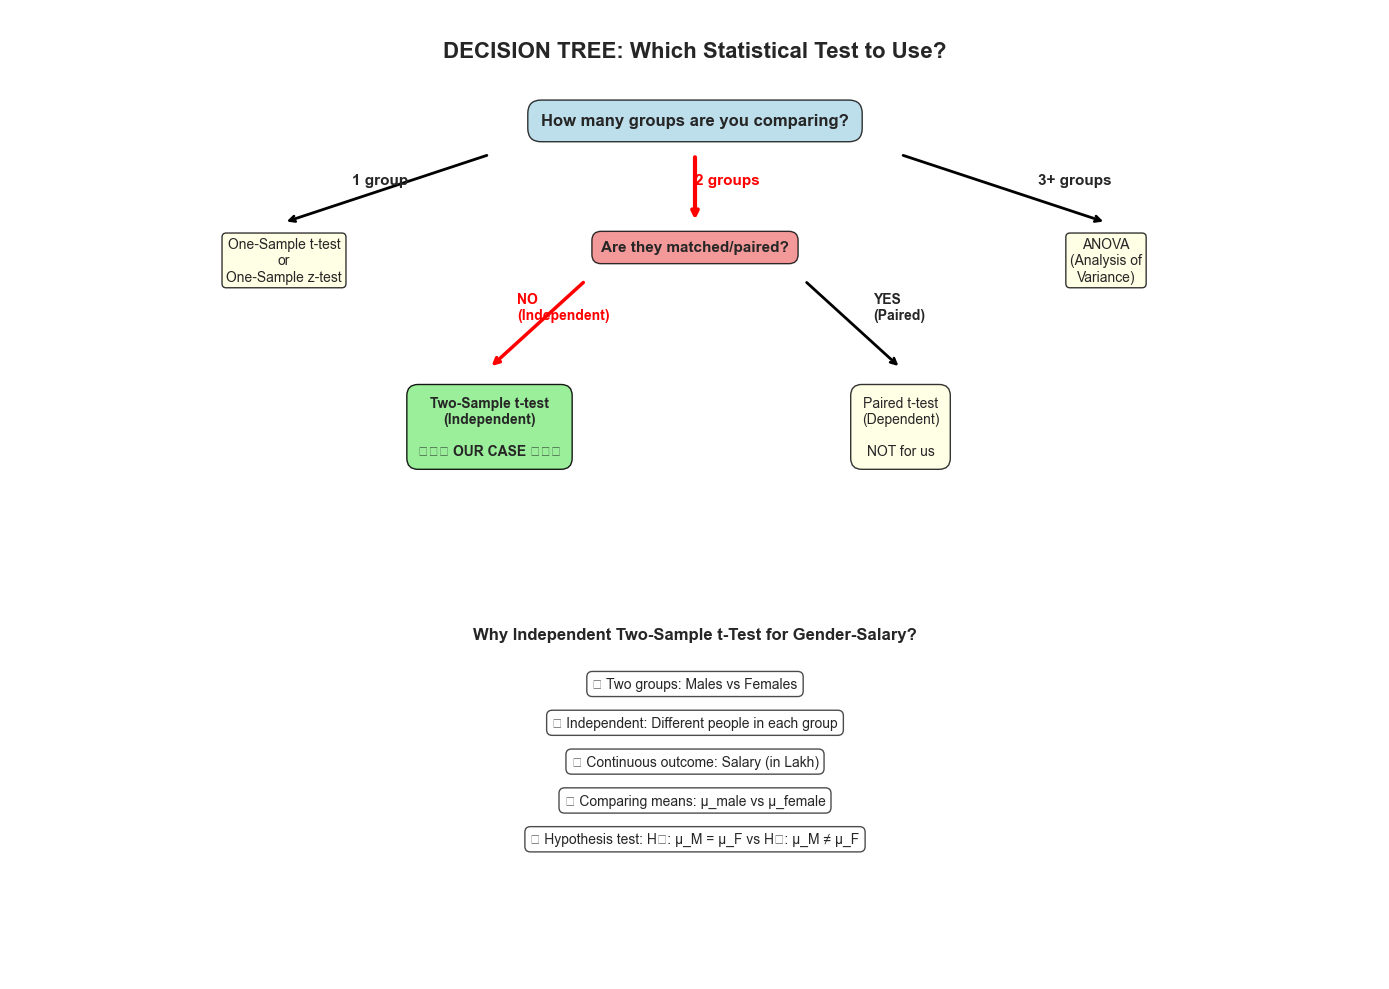

✓ Decision tree saved


In [11]:
# Create decision tree visualization
fig, ax = plt.subplots(figsize=(14, 10))
ax.axis('off')

# Title
ax.text(0.5, 0.95, 'DECISION TREE: Which Statistical Test to Use?', 
        ha='center', fontsize=16, fontweight='bold')

# Main question
ax.text(0.5, 0.88, 'How many groups are you comparing?', 
        ha='center', fontsize=12, fontweight='bold',
        bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8, pad=0.8))

# 1 group branch
ax.annotate('', xy=(0.2, 0.78), xytext=(0.35, 0.85),
            arrowprops=dict(arrowstyle='->', lw=2))
ax.text(0.25, 0.82, '1 group', fontsize=11, fontweight='bold')
ax.text(0.2, 0.72, 'One-Sample t-test\nor\nOne-Sample z-test', 
        ha='center', fontsize=10,
        bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))

# 2 groups branch - OUR CASE
ax.annotate('', xy=(0.5, 0.78), xytext=(0.5, 0.85),
            arrowprops=dict(arrowstyle='->', lw=3, color='red'))
ax.text(0.5, 0.82, '2 groups', fontsize=11, fontweight='bold', color='red')
ax.text(0.5, 0.75, 'Are they matched/paired?', 
        ha='center', fontsize=11, fontweight='bold',
        bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.8, pad=0.6))

# 2 groups - independent
ax.annotate('', xy=(0.35, 0.63), xytext=(0.42, 0.72),
            arrowprops=dict(arrowstyle='->', lw=2.5, color='red'))
ax.text(0.37, 0.68, 'NO\n(Independent)', fontsize=10, fontweight='bold', color='red')
ax.text(0.35, 0.54, 'Two-Sample t-test\n(Independent)\n\n✓✓✓ OUR CASE ✓✓✓', 
        ha='center', fontsize=10, fontweight='bold',
        bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.9, pad=0.8))

# 2 groups - paired
ax.annotate('', xy=(0.65, 0.63), xytext=(0.58, 0.72),
            arrowprops=dict(arrowstyle='->', lw=2))
ax.text(0.63, 0.68, 'YES\n(Paired)', fontsize=10, fontweight='bold')
ax.text(0.65, 0.54, 'Paired t-test\n(Dependent)\n\nNOT for us', 
        ha='center', fontsize=10,
        bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8, pad=0.8))

# 3+ groups branch
ax.annotate('', xy=(0.8, 0.78), xytext=(0.65, 0.85),
            arrowprops=dict(arrowstyle='->', lw=2))
ax.text(0.75, 0.82, '3+ groups', fontsize=11, fontweight='bold')
ax.text(0.8, 0.72, 'ANOVA\n(Analysis of\nVariance)', 
        ha='center', fontsize=10,
        bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))

# Our data characteristics
ax.text(0.5, 0.35, 'Why Independent Two-Sample t-Test for Gender-Salary?', 
        ha='center', fontsize=12, fontweight='bold')

characteristics = [
    '✓ Two groups: Males vs Females',
    '✓ Independent: Different people in each group',
    '✓ Continuous outcome: Salary (in Lakh)',
    '✓ Comparing means: μ_male vs μ_female',
    '✓ Hypothesis test: H₀: μ_M = μ_F vs H₁: μ_M ≠ μ_F'
]

y_pos = 0.30
for char in characteristics:
    ax.text(0.5, y_pos, char, ha='center', fontsize=10,
           bbox=dict(boxstyle='round', facecolor='white', alpha=0.7, pad=0.4))
    y_pos -= 0.04

plt.tight_layout()
plt.savefig('two_sample_test_decision.png', dpi=150, bbox_inches='tight')
plt.show()

print("✓ Decision tree saved")